<a href="https://colab.research.google.com/github/soroushmirzaei/engineering-industries-projects/blob/main/building-energy-efficiency-prediction/building-energy-efficiency-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import mathematics statistics libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning deep learning libraries
import tensorflow as tf
from tensorflow import keras


In [ ]:
#download dataset
!curl -o energy-efficiency.xlsx https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76189  100 76189    0     0   567k      0 --:--:-- --:--:-- --:--:--  567k


In [ ]:
#load dataset
data = pd.read_excel('energy-efficiency.xlsx')


In [ ]:
#rename dataset header
header_des = """X1	Relative Compactness
X2	Surface Area
X3	Wall Area
X4	Roof Area
X5	Overall Height
X6	Orientation
X7	Glazing Area
X8	Glazing Area Distribution
Y1	Heating Load
Y2	Cooling Load"""

header_dict = dict()

for line in header_des.split('\n'):
    line = line.split('\t')
    header_dict[line[0]] = line[1]

data = data.rename(lambda col : header_dict[col], axis = 1)
data.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
#dataset information
print(f'Dataset Shape:\n{data.shape[0]} Rows {data.shape[1]} Columns\n')
print(f'Dataset Columns:\n{np.array(data.columns)}\n')
print(f'Dataset Columns Type:\n{np.array([(col, dtype) for col, dtype in data.dtypes.to_dict().items()])}')


Dataset Shape:
768 Rows 10 Columns

Dataset Columns:
['Relative Compactness' 'Surface Area' 'Wall Area' 'Roof Area'
 'Overall Height' 'Orientation' 'Glazing Area' 'Glazing Area Distribution'
 'Heating Load' 'Cooling Load']

Dataset Columns Type:
[['Relative Compactness' dtype('float64')]
 ['Surface Area' dtype('float64')]
 ['Wall Area' dtype('float64')]
 ['Roof Area' dtype('float64')]
 ['Overall Height' dtype('float64')]
 ['Orientation' dtype('int64')]
 ['Glazing Area' dtype('float64')]
 ['Glazing Area Distribution' dtype('int64')]
 ['Heating Load' dtype('float64')]
 ['Cooling Load' dtype('float64')]]


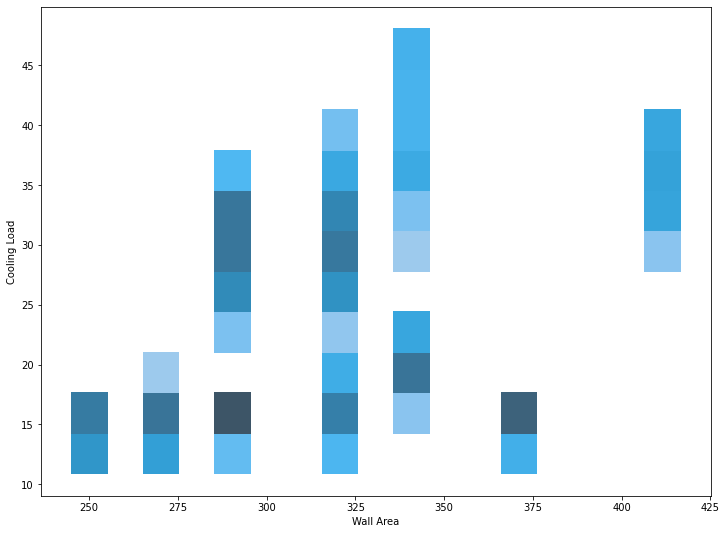

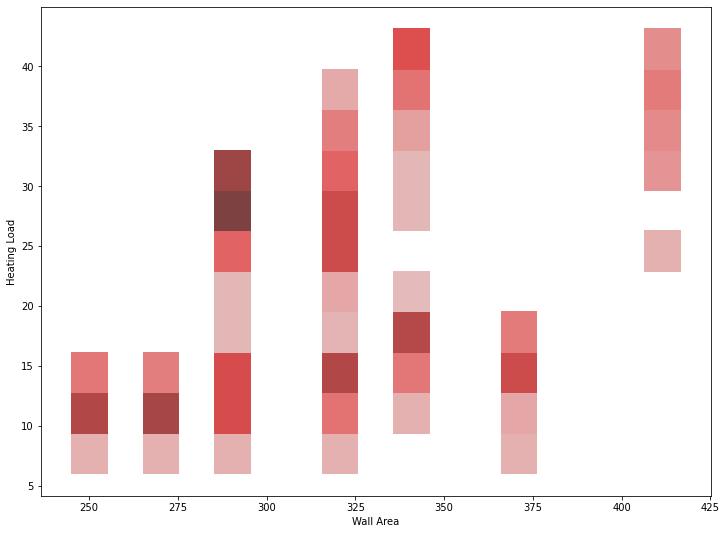

In [ ]:
#draw scatterplot based on wall area versus heating and cooling load
plt.figure(figsize = (12, 9))
sns.histplot(x = data['Wall Area'], y = data['Cooling Load'], color = '#2c8ebf')
plt.show()

plt.figure(figsize = (12, 9))
sns.histplot(x = data['Wall Area'], y = data['Heating Load'], color = '#d44646')
plt.show()


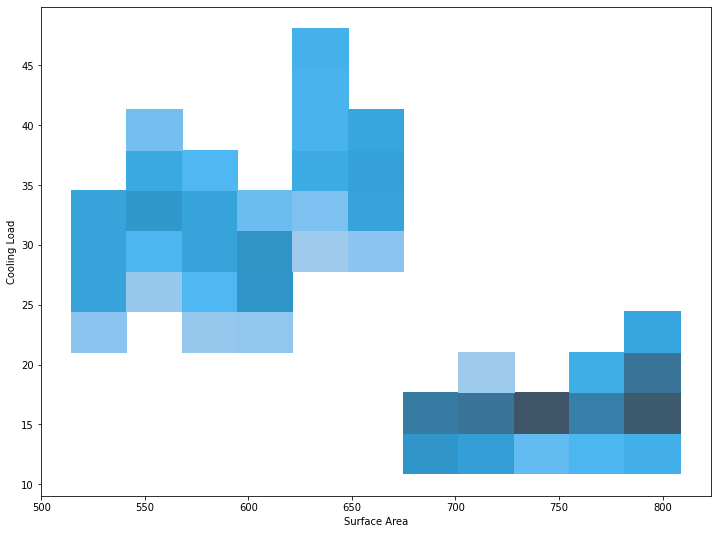

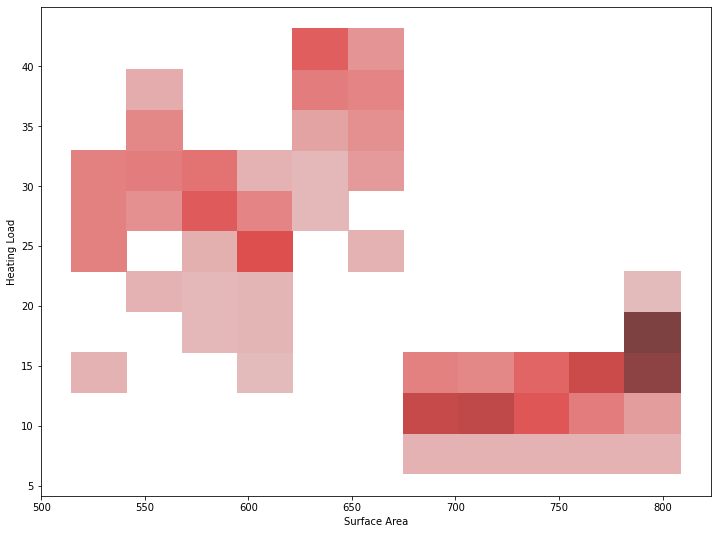

In [ ]:
#draw scatterplot based on surface area versus heating and cooling load
plt.figure(figsize = (12, 9))
sns.histplot(x = data['Surface Area'], y = data['Cooling Load'], color = '#2c8ebf')
plt.show()

plt.figure(figsize = (12, 9))
sns.histplot(x = data['Surface Area'], y = data['Heating Load'], color = '#d44646')
plt.show()


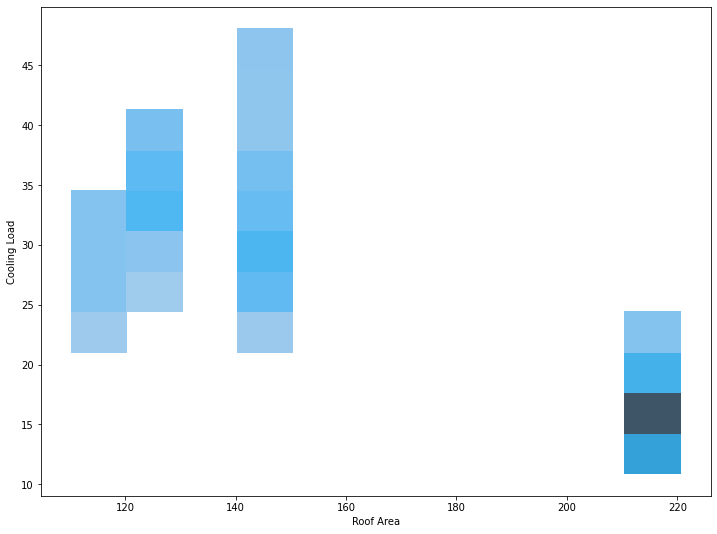

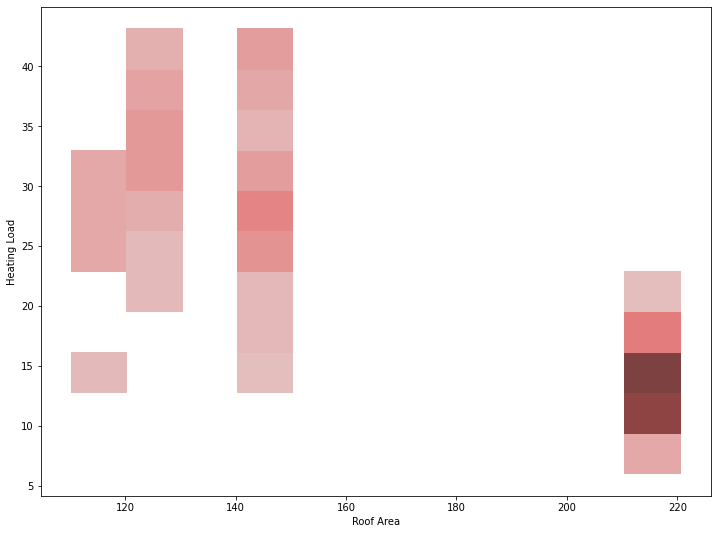

In [ ]:
#draw scatterplot based on roof area versus heating and cooling load
plt.figure(figsize = (12, 9))
sns.histplot(x = data['Roof Area'], y = data['Cooling Load'], color = '#2c8ebf')
plt.show()

plt.figure(figsize = (12, 9))
sns.histplot(x = data['Roof Area'], y = data['Heating Load'], color = '#d44646')
plt.show()


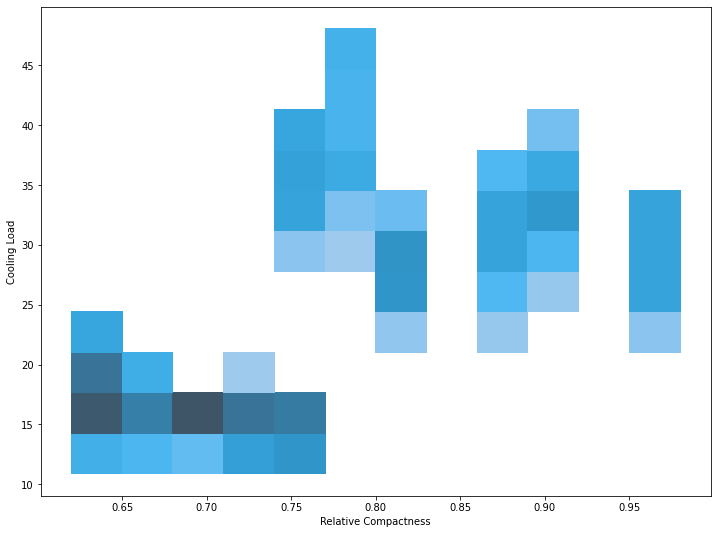

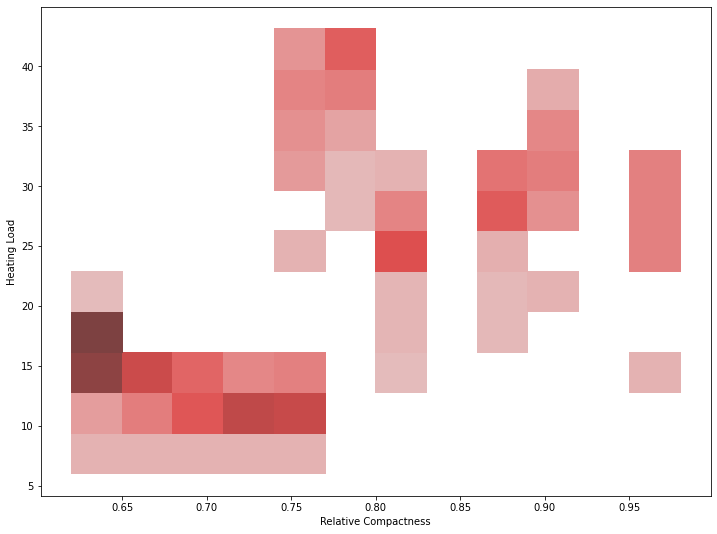

In [ ]:
#draw scatterplot based on relative compactness versus heating and cooling load
plt.figure(figsize = (12, 9))
sns.histplot(x = data['Relative Compactness'], y = data['Cooling Load'], color = '#2c8ebf')
plt.show()

plt.figure(figsize = (12, 9))
sns.histplot(x = data['Relative Compactness'], y = data['Heating Load'], color = '#d44646')
plt.show()


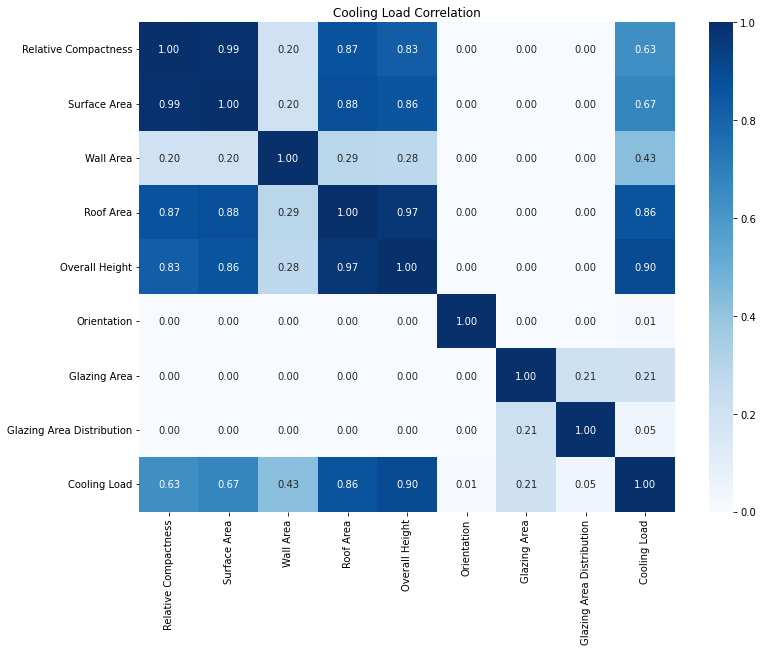

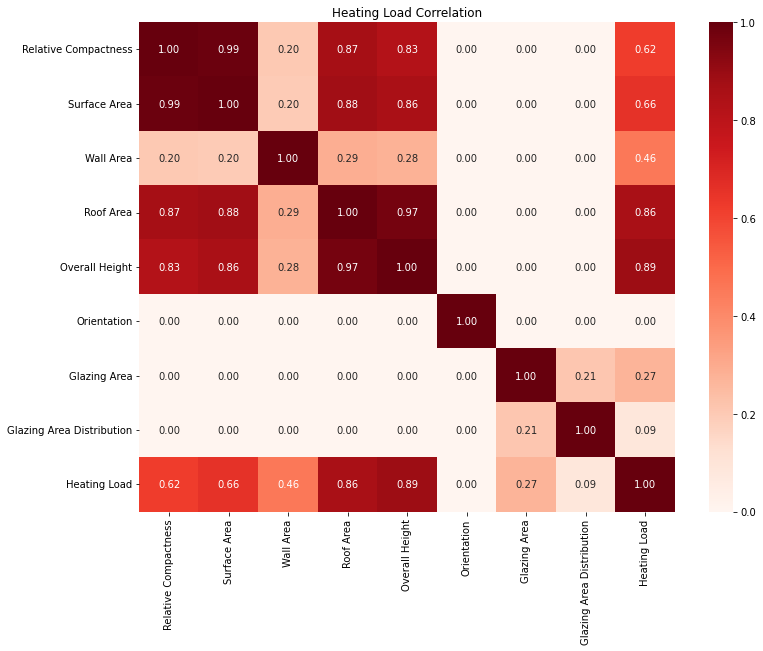

In [ ]:
#draw heatmap of correlation
plt.figure(figsize = (12, 9))
sns.heatmap(data.drop('Heating Load', axis = 1).corr().abs(), cmap = 'Blues',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.title('Cooling Load Correlation')
plt.show()

plt.figure(figsize = (12, 9))
sns.heatmap(data.drop('Cooling Load', axis = 1).corr().abs(), cmap = 'Reds',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.title('Heating Load Correlation')
plt.show()


In [ ]:
#principle component analysis
from sklearn.decomposition import PCA

pca_cool = PCA(random_state = True)
pca_heat = PCA(random_state = True)

pca_data_cool = pd.DataFrame(pca_cool.fit_transform(data.iloc[:,:-2], data.iloc[:,-1]),
                             columns = [f'PCA {col}' for col in data.columns[:-2]])
pca_data_heat = pd.DataFrame(pca_heat.fit_transform(data.iloc[:,:-2], data.iloc[:,-2]),
                             columns = [f'PCA {col}' for col in data.columns[:-2]])

pca_cool_data = pd.concat([pca_data_cool, data.iloc[:,-1]], axis = 1)
pca_heat_data = pd.concat([pca_data_heat, data.iloc[:,-2]], axis = 1)


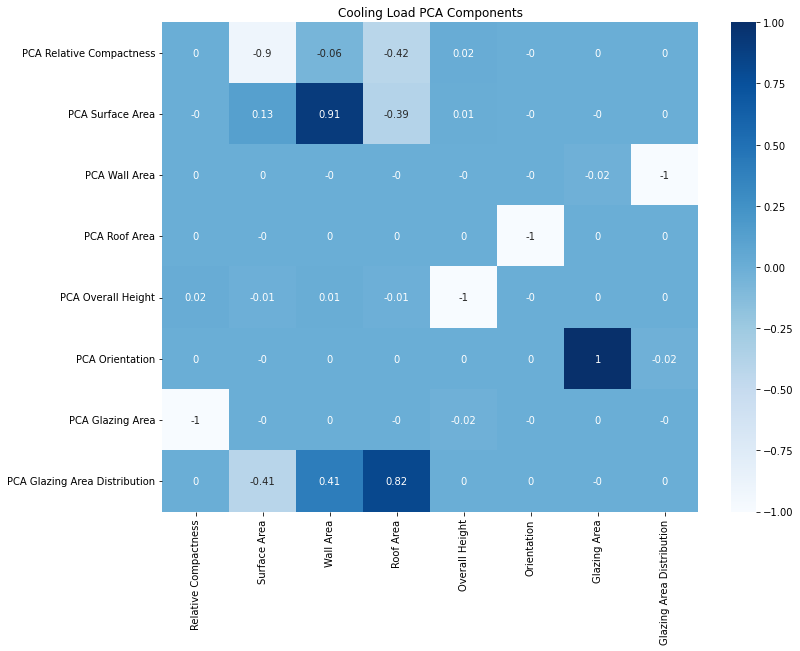

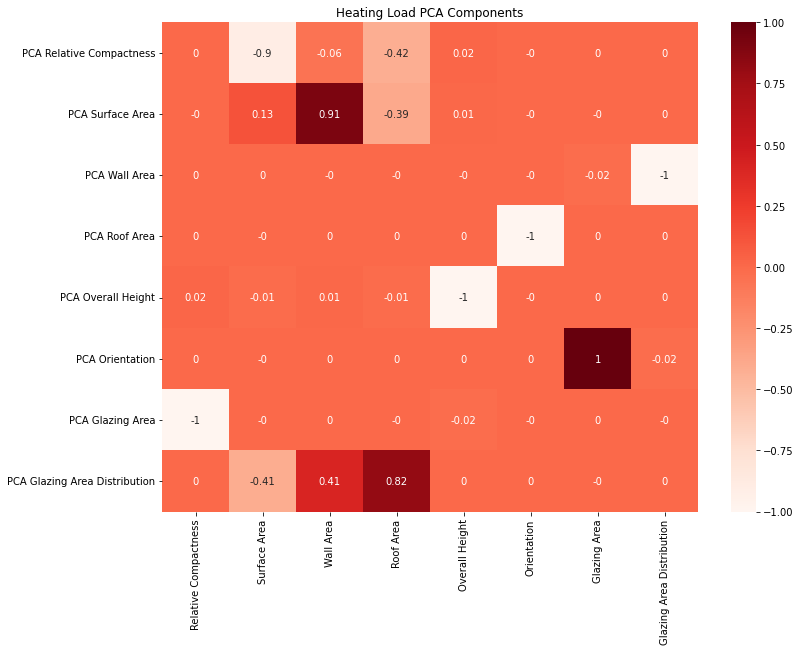

In [ ]:
#plot component heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(pd.DataFrame(pca_cool.components_, columns = [col for col in data.columns[:-2]],
                         index = [f'PCA {col}' for col in data.columns[:-2]]).round(2),
            annot = True, vmin = -1, vmax = 1, cmap = 'Blues')
plt.title('Cooling Load PCA Components')
plt.show()

plt.figure(figsize = (12, 9))
sns.heatmap(pd.DataFrame(pca_heat.components_, columns = [col for col in data.columns[:-2]],
                         index = [f'PCA {col}' for col in data.columns[:-2]]).round(2),
            annot = True, vmin = -1, vmax = 1, cmap = 'Reds')
plt.title('Heating Load PCA Components')
plt.show()


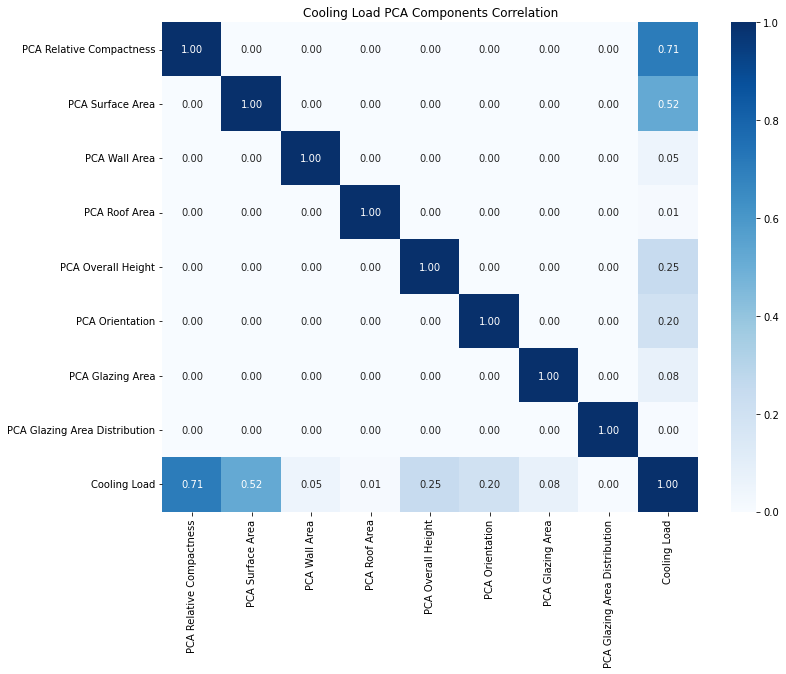

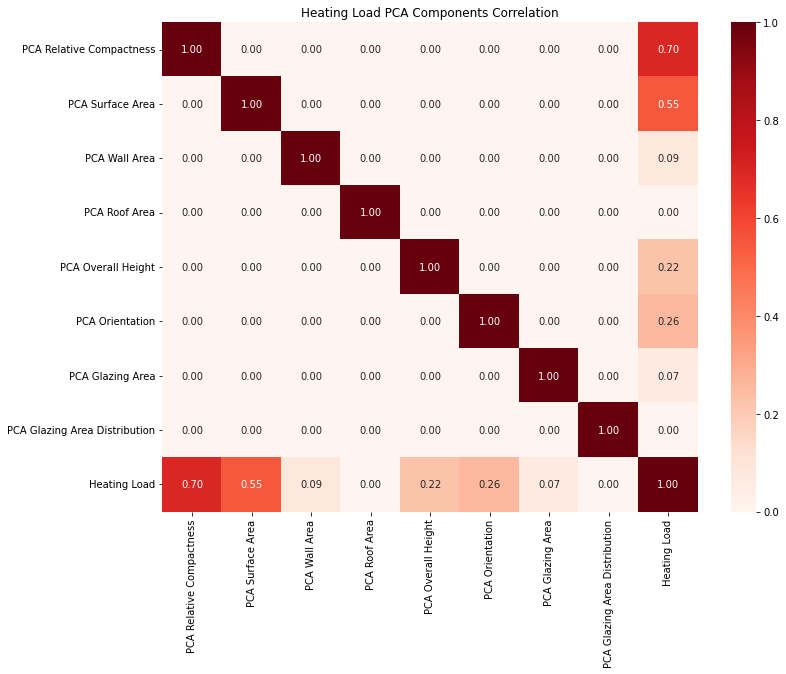

In [ ]:
#draw heatmap of pca target correlation
plt.figure(figsize = (12, 9))
sns.heatmap(pca_cool_data.corr().abs(), cmap = 'Blues',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.title('Cooling Load PCA Components Correlation')
plt.show()

plt.figure(figsize = (12, 9))
sns.heatmap(pca_heat_data.corr().abs(), cmap = 'Reds',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.title('Heating Load PCA Components Correlation')
plt.show()


In [ ]:
#concatenate data and pca data base on info graphic mutual information
data = pd.concat([data, pca_heat_data[['PCA Relative Compactness', 'PCA Surface Area']]], axis = 1)

#sample of data
data.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,PCA Relative Compactness,PCA Surface Area
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,171.647343,-16.040847
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,171.647343,-16.040847
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,171.647343,-16.040847
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,171.647343,-16.040847
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,120.751600,7.638780


In [ ]:
#split dataset for train and valid
from sklearn.model_selection import train_test_split
inp_tn, inp_ts, out_tn, out_ts = train_test_split(data.drop(['Heating Load','Cooling Load'], axis = 1),
                                                  data[['Heating Load','Cooling Load']],
                                                  train_size = 0.9, random_state = True)


In [ ]:
#train dataset before pre-processing
inp_tn.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,PCA Relative Compactness,PCA Surface Area
69,0.76,661.5,416.5,122.50,7.0,3,0.10,1,26.503295,109.252145
382,0.62,808.5,367.5,220.50,3.5,4,0.25,2,-145.097670,44.604327
195,0.98,514.5,294.0,110.25,7.0,5,0.10,4,171.647343,-16.040847
84,0.66,759.5,318.5,220.50,3.5,2,0.10,1,-97.973550,-6.202351
442,0.86,588.0,294.0,147.00,7.0,4,0.25,4,89.646357,-21.211992


In [ ]:
#normalization dataset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

norm_cls_trns = ColumnTransformer([('norm', StandardScaler(), inp_tn.columns)],
                                  remainder = 'passthrough')

inp_tn = pd.DataFrame(norm_cls_trns.fit_transform(inp_tn), columns = inp_tn.columns, index = inp_tn.index)
inp_ts = pd.DataFrame(norm_cls_trns.transform(inp_ts), columns = inp_ts.columns, index = inp_ts.index)


In [ ]:
#train dataset after pre-processing
inp_tn.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,PCA Relative Compactness,PCA Surface Area
69,-0.043437,-0.112626,2.223468,-1.193600,1.007262,-0.439580,-1.000548,-1.176298,0.269853,2.274757
382,-1.360710,1.555048,1.116540,0.965504,-0.992790,0.456437,0.130388,-0.531201,-1.493833,0.934254
195,2.026563,-1.780301,-0.543853,-1.463488,1.007262,1.352453,-1.000548,0.758992,1.761619,-0.323252
84,-0.984346,0.999157,0.009612,0.965504,-0.992790,-1.335596,-1.000548,-1.176298,-1.009499,-0.119246
442,0.897472,-0.946463,-0.543853,-0.653824,1.007262,0.456437,0.130388,0.758992,0.918827,-0.430478


In [ ]:
#define model
input = keras.layers.Input(shape = (len(data.columns) - 2), name = 'input_layer')

#define hidden layers
out_first = keras.layers.Dense(256, 'relu', name = 'first_dense')(input) #first dense layer
out_second = keras.layers.Dense(128, 'relu', name = 'second_dense')(out_first)
out_third = keras.layers.Dense(128, 'relu', name = 'third_dense')(out_second)

#define output layers
Heating_load_output = keras.layers.Dense(1, name = 'heating_load_output')(out_second)
Cooling_load_output = keras.layers.Dense(1, name = 'cooling_load_output')(out_third)

#define model object
model = keras.models.Model(inputs = [input],
                           outputs = [Heating_load_output, Cooling_load_output])


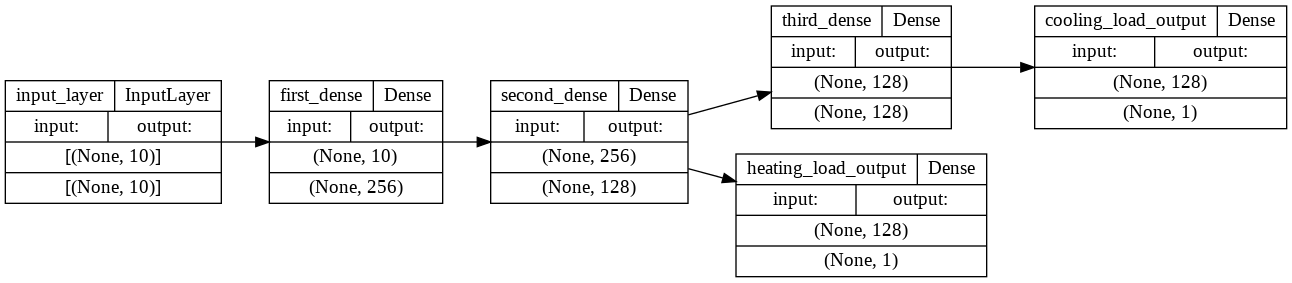

In [ ]:
#plot model
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, rankdir = 'LR')


In [ ]:
#model summary
model.summary(130)


Model: "model"
__________________________________________________________________________________________________________________________________
 Layer (type)                             Output Shape                 Param #         Connected to                               
 input_layer (InputLayer)                 [(None, 10)]                 0               []                                         
                                                                                                                                  
 first_dense (Dense)                      (None, 256)                  2816            ['input_layer[0][0]']                      
                                                                                                                                  
 second_dense (Dense)                     (None, 128)                  32896           ['first_dense[0][0]']                      
                                                                    

In [ ]:
#compile and fit model
model.compile(optimizer = keras.optimizers.Adam(),
              loss = keras.losses.Huber(),
              metrics = keras.metrics.MeanAbsoluteError())

model.fit(x = inp_tn, y = [out_tn['Heating Load'], out_tn['Cooling Load']], epochs = 10000, verbose = 0,
          validation_data = (inp_ts, [out_ts['Heating Load'], out_ts['Cooling Load']]))


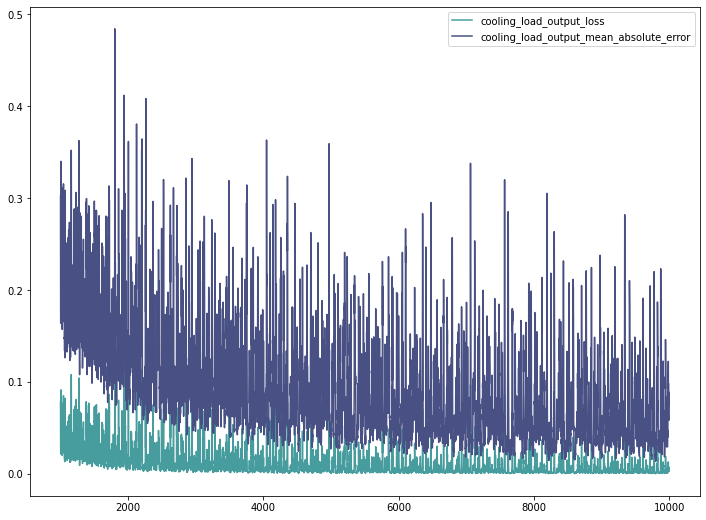

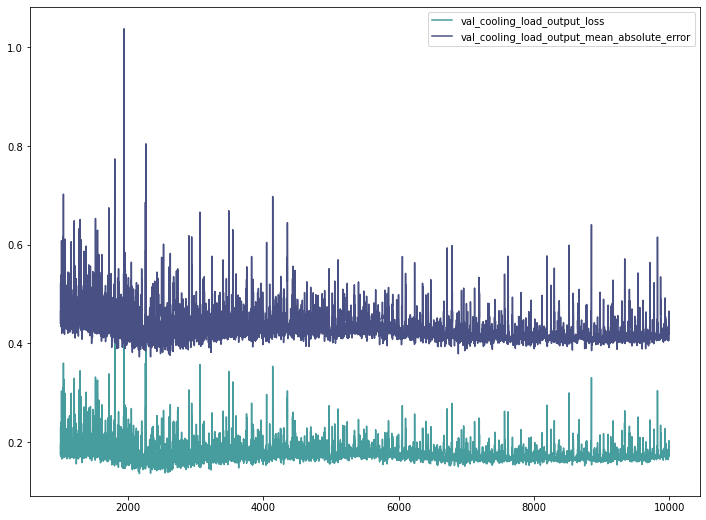

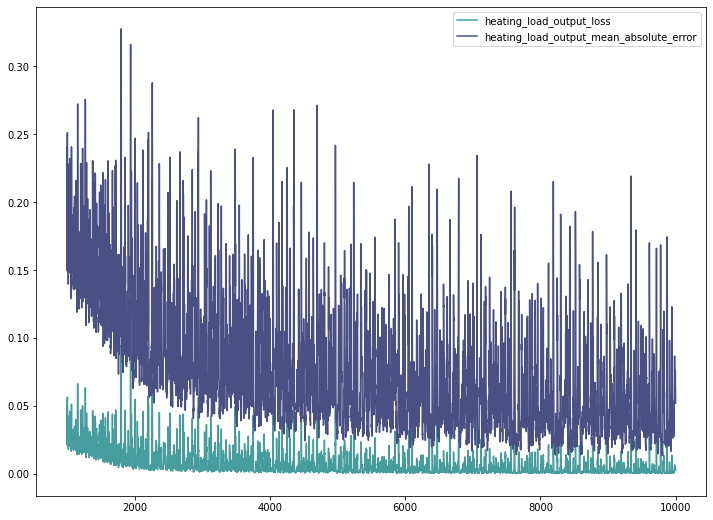

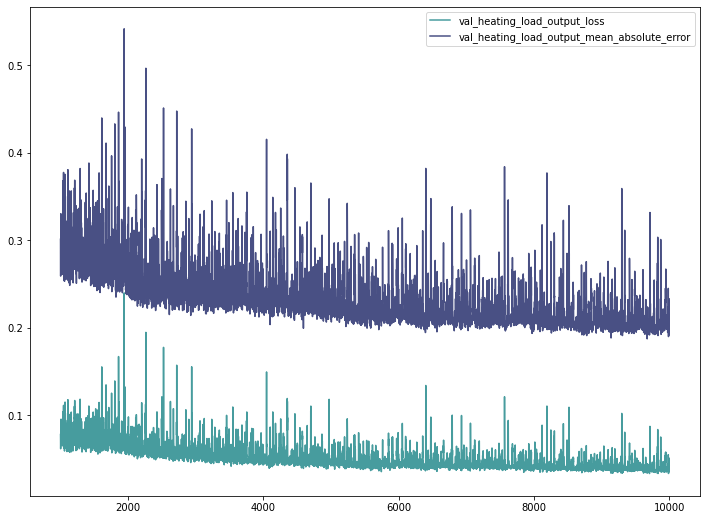

In [ ]:
#plot model history
history = pd.DataFrame(model.history.history)
train_hist_col_cooling = [col for col in history.columns if not col.startswith('val') and 'cooling' in col]
valid_hist_col_cooling = [col for col in history.columns if col.startswith('val') and 'cooling' in col]

train_hist_col_heating = [col for col in history.columns if not col.startswith('val') and 'heating' in col]
valid_hist_col_heating = [col for col in history.columns if col.startswith('val') and 'heating' in col]

history[train_hist_col_cooling][1000:].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.show()

history[valid_hist_col_cooling][1000:].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.show()

history[train_hist_col_heating][1000:].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.show()

history[valid_hist_col_heating][1000:].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.show()



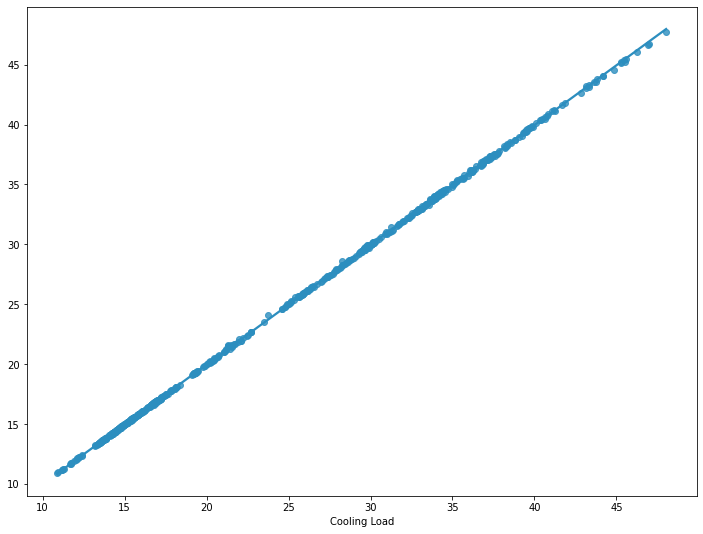

slope & intercept
(0.9998588105477456, -0.04230197360100263)


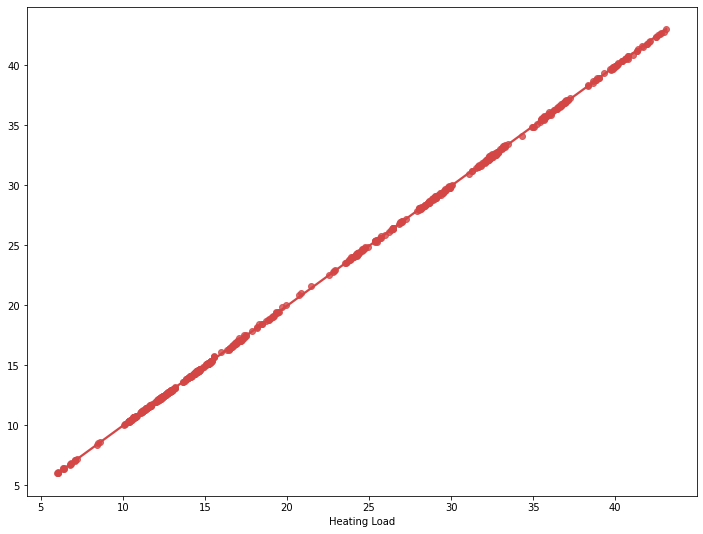

slope & intercept
(0.9990665617337772, -0.022242516485803776)


In [ ]:
#plot and calculate slope and intercept for training set and its prediction
from scipy.stats import linregress

train_pred = model.predict(inp_tn)

plt.figure(figsize = (12, 9))
sns.regplot(x = out_tn['Cooling Load'], y = train_pred[1].flatten(), color = '#2c8ebf')
plt.show()

print('slope & intercept')
print(linregress(out_tn['Cooling Load'].values.flatten(), train_pred[1].flatten())[:2])


plt.figure(figsize = (12, 9))
sns.regplot(x = out_tn['Heating Load'], y = train_pred[0].flatten(), color = '#d44646')
plt.show()

print('slope & intercept')
print(linregress(out_tn['Heating Load'].values.flatten(), train_pred[0].flatten())[:2])


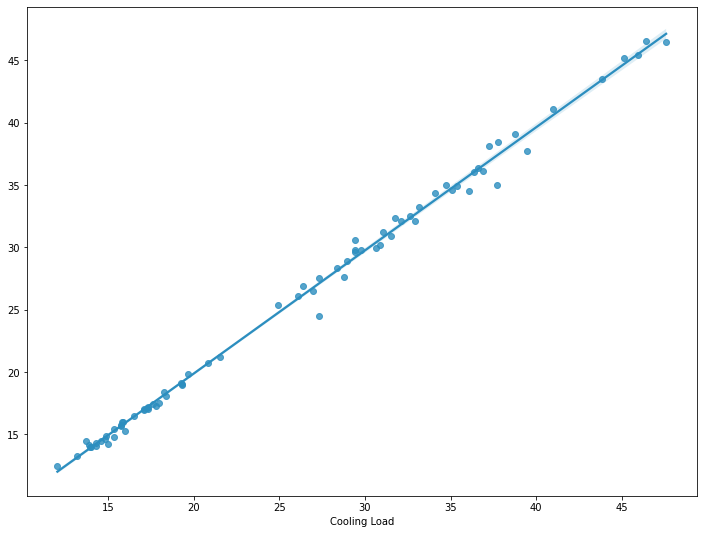

slope & intercept
(0.987558980556521, 0.12871340671271625)


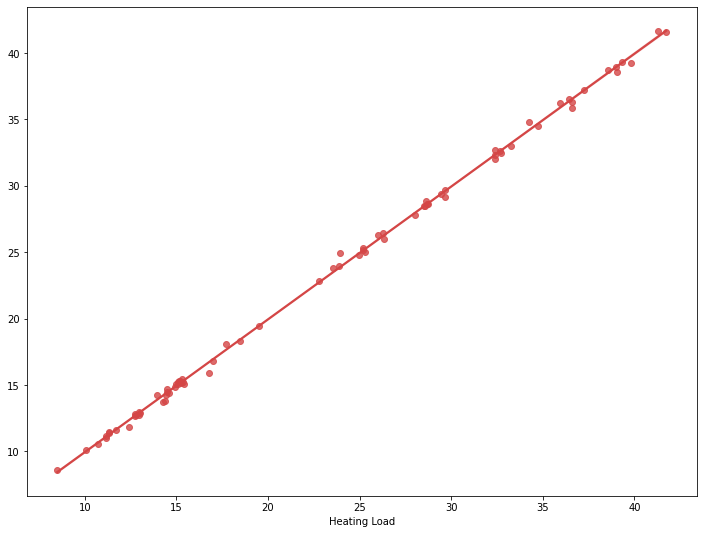

slope & intercept
(0.9996624686008492, -0.04474893458494478)


In [ ]:
#plot and calculate slope and intercept for training set and its prediction
valid_pred = model.predict(inp_ts)

plt.figure(figsize = (12, 9))
sns.regplot(x = out_ts['Cooling Load'], y = valid_pred[1].flatten(), color = '#2c8ebf')
plt.show()

print('slope & intercept')
print(linregress(out_ts['Cooling Load'].values.flatten(), valid_pred[1].flatten())[:2])


plt.figure(figsize = (12, 9))
sns.regplot(x = out_ts['Heating Load'], y = valid_pred[0].flatten(), color = '#d44646')
plt.show()

print('slope & intercept')
print(linregress(out_ts['Heating Load'].values.flatten(), valid_pred[0].flatten())[:2])


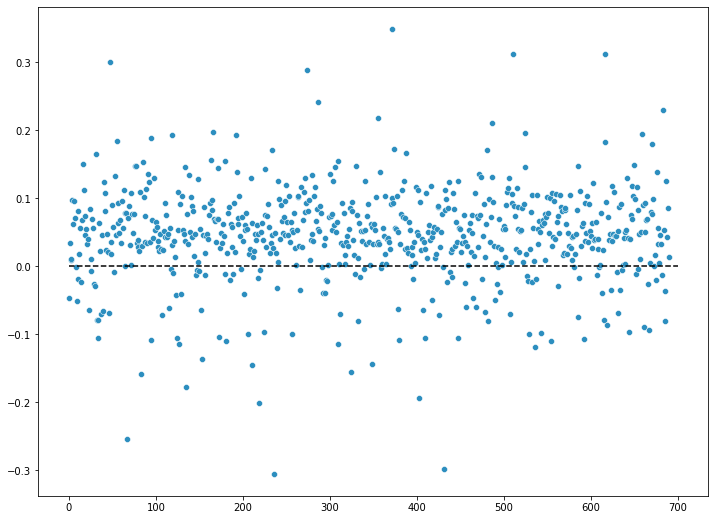

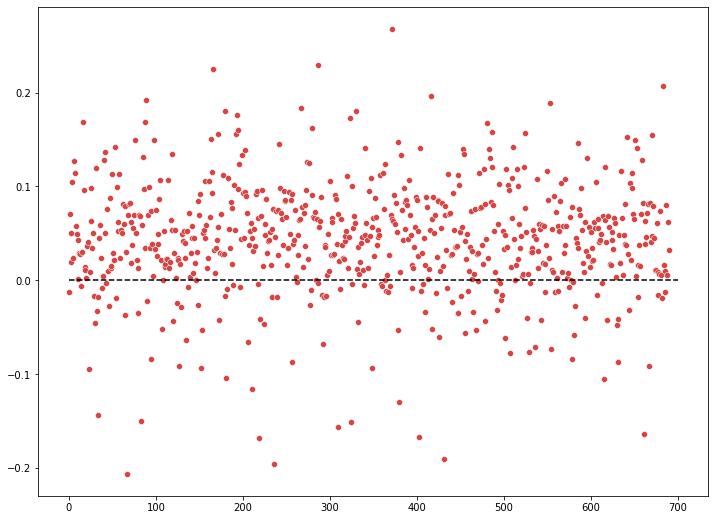

In [ ]:
#plot differ for training set
train_cool = out_tn['Cooling Load'].values.flatten() - train_pred[1].flatten()
train_heat = out_tn['Heating Load'].values.flatten() - train_pred[0].flatten()

plt.figure(figsize = (12, 9))
sns.scatterplot(data = train_cool, color = '#2c8ebf')
plt.hlines(0, 0, 700, linestyle = '--')
plt.show()

plt.figure(figsize = (12, 9))
sns.scatterplot(data = train_heat, color = '#d44646')
plt.hlines(0, 0, 700, linestyle = '--')
plt.show()


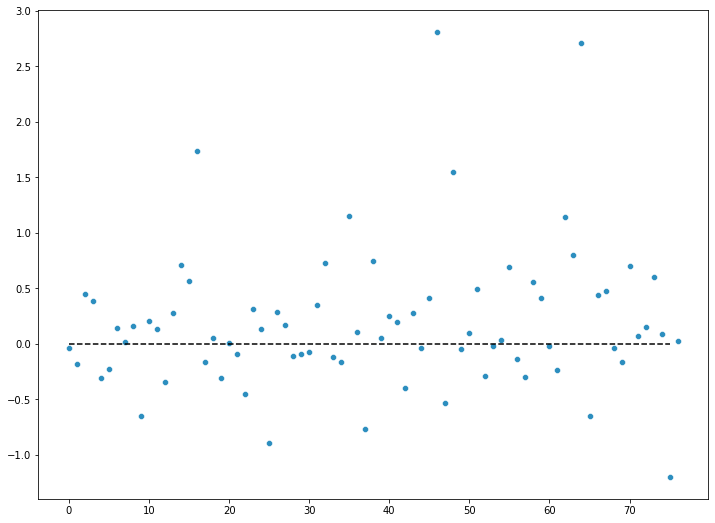

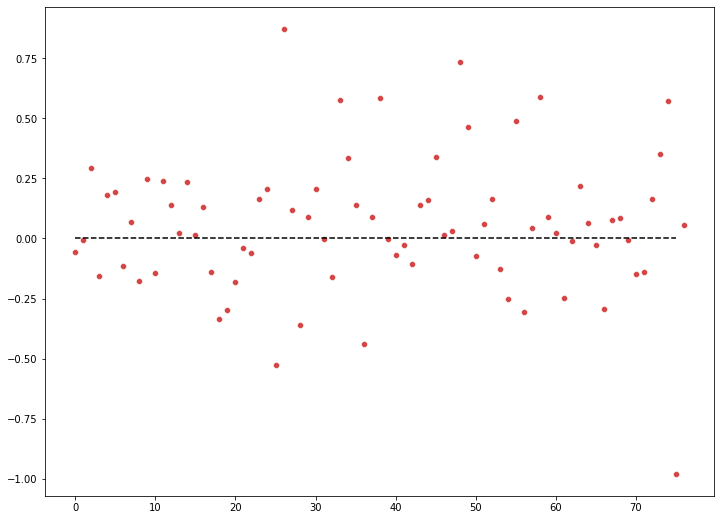

In [ ]:
#plot differ for validation set
cool = out_ts['Cooling Load'].values.flatten() - valid_pred[1].flatten()
heat = out_ts['Heating Load'].values.flatten() - valid_pred[0].flatten()

plt.figure(figsize = (12, 9))
sns.scatterplot(data = cool, color = '#2c8ebf')
plt.hlines(0, 0, 75, linestyle = '--')
plt.show()

plt.figure(figsize = (12, 9))
sns.scatterplot(data = heat, color = '#d44646')
plt.hlines(0, 0, 75, linestyle = '--')
plt.show()


In [ ]:
#model evaluation
train_eval = model.evaluate(inp_tn, out_tn, verbose = 0, return_dict = True)
valid_eval = model.evaluate(inp_ts, out_ts, verbose = 0, return_dict = True)

print('training evaluation:')
for metric in train_eval:
    print(f'\t{metric}: {train_eval[metric]:.4f}')

print('validation evaluation:')
for metric in valid_eval:
    print(f'\t{metric}: {valid_eval[metric]:.4f}')
    

training evaluation:
	loss: 2.1743
	heating_load_output_loss: 1.0999
	cooling_load_output_loss: 1.0744
	heating_load_output_mean_absolute_error: 1.3623
	cooling_load_output_mean_absolute_error: 1.3393
validation evaluation:
	loss: 2.5834
	heating_load_output_loss: 1.2861
	cooling_load_output_loss: 1.2973
	heating_load_output_mean_absolute_error: 1.6044
	cooling_load_output_mean_absolute_error: 1.6574
